# Data Science Project - Sales Forecast

- Our challenge is to forecast sales that we will have in a given period based on ad spending in three major networks that the a company invests: TV, newspaper and radio


### Step by Step: DS Project

- Step 1: Understanding the Challenge
- Step 2: Area/Company Understanding
- Step 3: Data Extraction/Obtainment
- Step 4: Data Adjustment (Treatment/Cleaning)
- Step 5: Exploratory Analysis
- Step 6: Modeling + Algorithms
- Step 7: Interpretation of Results

#### Import Database

In [31]:
import pandas as pd

df = pd.read_csv('Advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Exploratory Analysis
- Let's try to visualize how each item's information is distributed
- Let's see the correlation between each of the items

<function matplotlib.pyplot.show(close=None, block=None)>

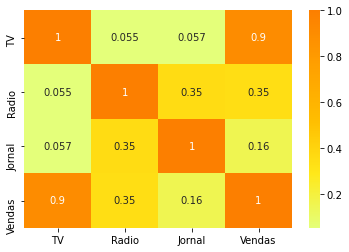

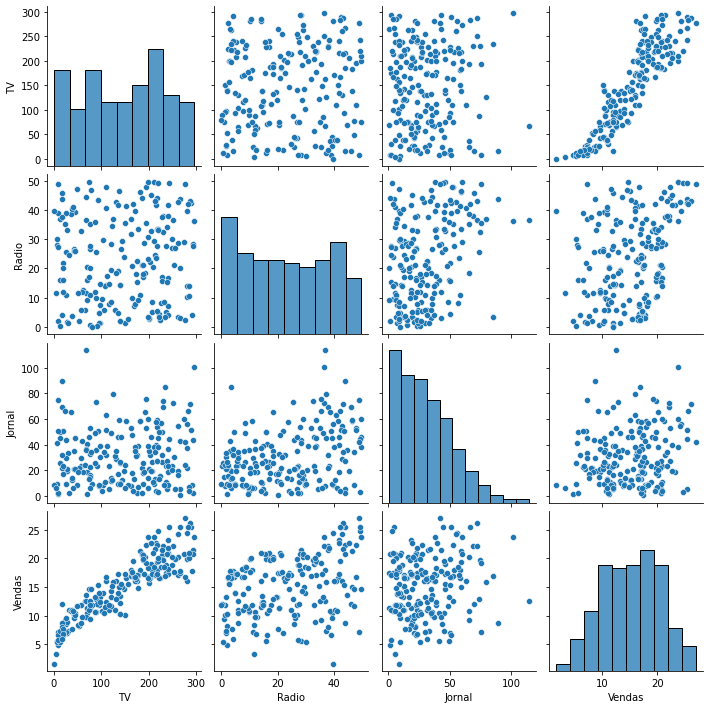

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.show

sns.pairplot(df)
plt.show

#### With that, we can start preparing the data to train the Machine Learning Model

- Separating into training data and test data

In [33]:
from sklearn.model_selection import train_test_split

y = df['Vendas']
x = df.drop('Vendas', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#### We have a regression problem - Let's choose the models we're going to use:

- Linear Regression
- RandomForest

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

li_reg = LinearRegression()
li_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)


RandomForestRegressor()

#### AI Test and Best Model Evaluation

- Let's use R² -> says the % that our model can explain what happens

In [35]:
pred_lin_reg = li_reg.predict(x_test)
pred_rf_reg = rf_reg.predict(x_test)

from sklearn import metrics
print(metrics.r2_score(y_test, pred_lin_reg))
print(metrics.r2_score(y_test, pred_rf_reg))

0.904891724136168
0.9655867292429282


#### Graphical preview of forecasts

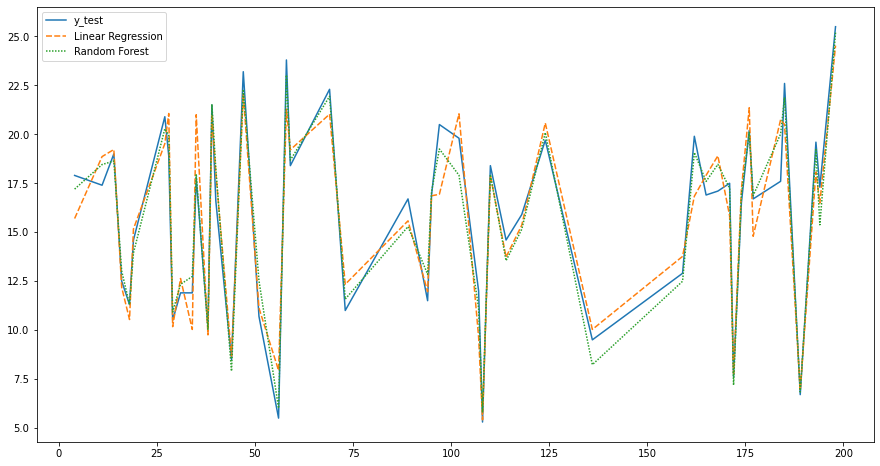

In [36]:
#Random Forest is the best model
df_aux = pd.DataFrame()
df_aux['y_test'] = y_test
df_aux['Linear Regression'] = pred_lin_reg
df_aux['Random Forest'] = pred_rf_reg

plt.figure(figsize=(15,8))
sns.lineplot(data=df_aux)
plt.show()

#### How important is each variable to sales?

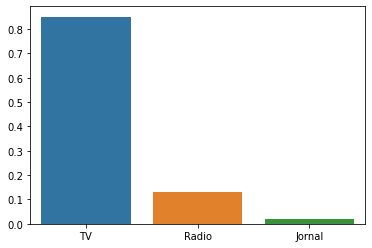

In [37]:
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()